# Diabetes Prediction 

## Importing libraries 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for warnings
import warnings
warnings.simplefilter(action = "ignore")

#for model building
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

sns.set()
plt.style.use('ggplot')

In [80]:
#reading the dataset
df = pd.read_csv('Diabetes dataset.csv')

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
print("Dataset shape: ",df.shape)

Dataset shape:  (768, 9)


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## EDA 

In [85]:
# Print the distribution of the Outcome variable.
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [86]:
# Print the classes of the outcome variable.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

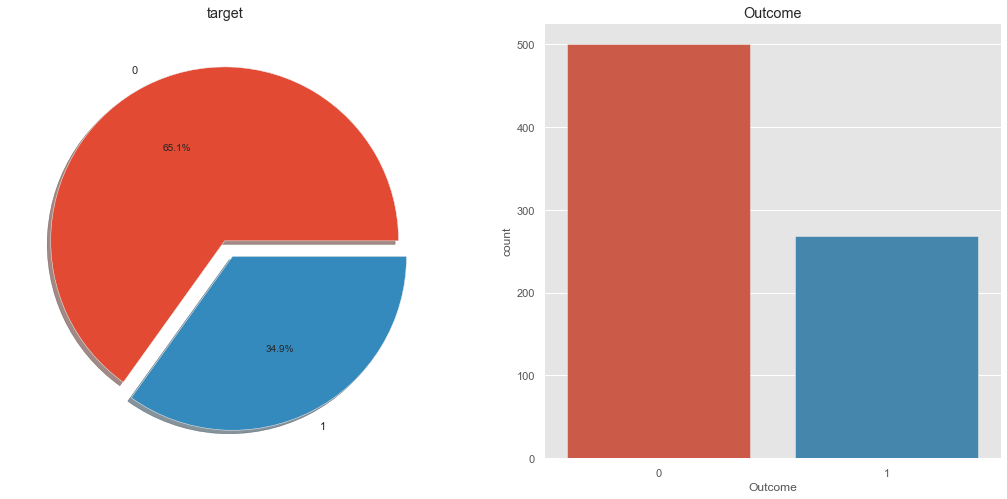

In [87]:
# Visualize the distribution of the outcome variable in the data: 0 - Healthy, 1 - Diabetic
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

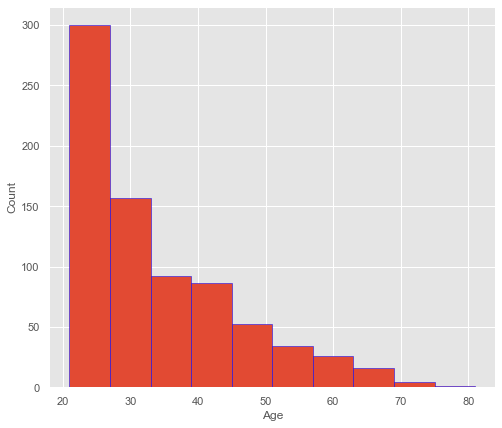

In [88]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
df["Age"].hist(edgecolor = "blue");

In [89]:
print("Max Age: " + str(df["Age"].max()) +','+ " Min Age: " + str(df["Age"].min()))

Max Age: 81, Min Age: 21


<AxesSubplot:xlabel='BMI', ylabel='Density'>

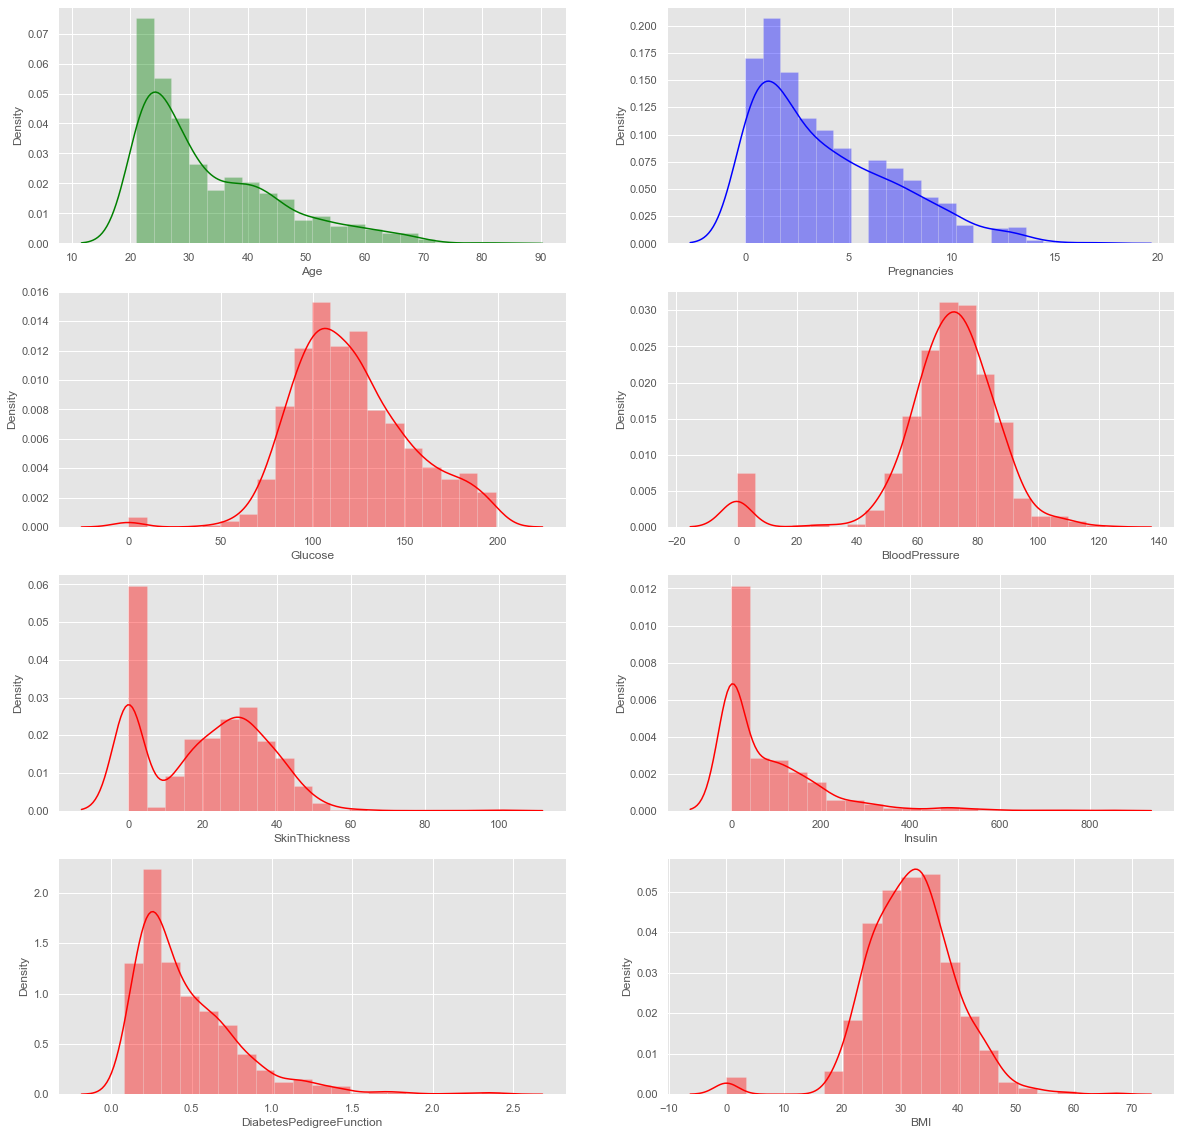

In [90]:
# Plotting histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Age, bins = 20, ax=ax[0,0], color="green") 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1], color="blue") 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0], color="red") 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1], color="red") 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0], color="red")
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="red") 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1], color="red")

In [91]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [92]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [93]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [94]:
df.groupby("Outcome").agg({"Insulin":"mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [95]:
df.groupby("Outcome").agg({"Insulin":"max"})

,Insulin
Outcome,
0,744
1,846


In [96]:
df.groupby("Outcome").agg({"Glucose":"mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [97]:
df.groupby("Outcome").agg({"Glucose":"max"})

,Glucose
Outcome,
0,197
1,199


In [98]:
df.groupby("Outcome").agg({"BMI":"mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [99]:
#pair wise correlation of all columns in dataframe
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


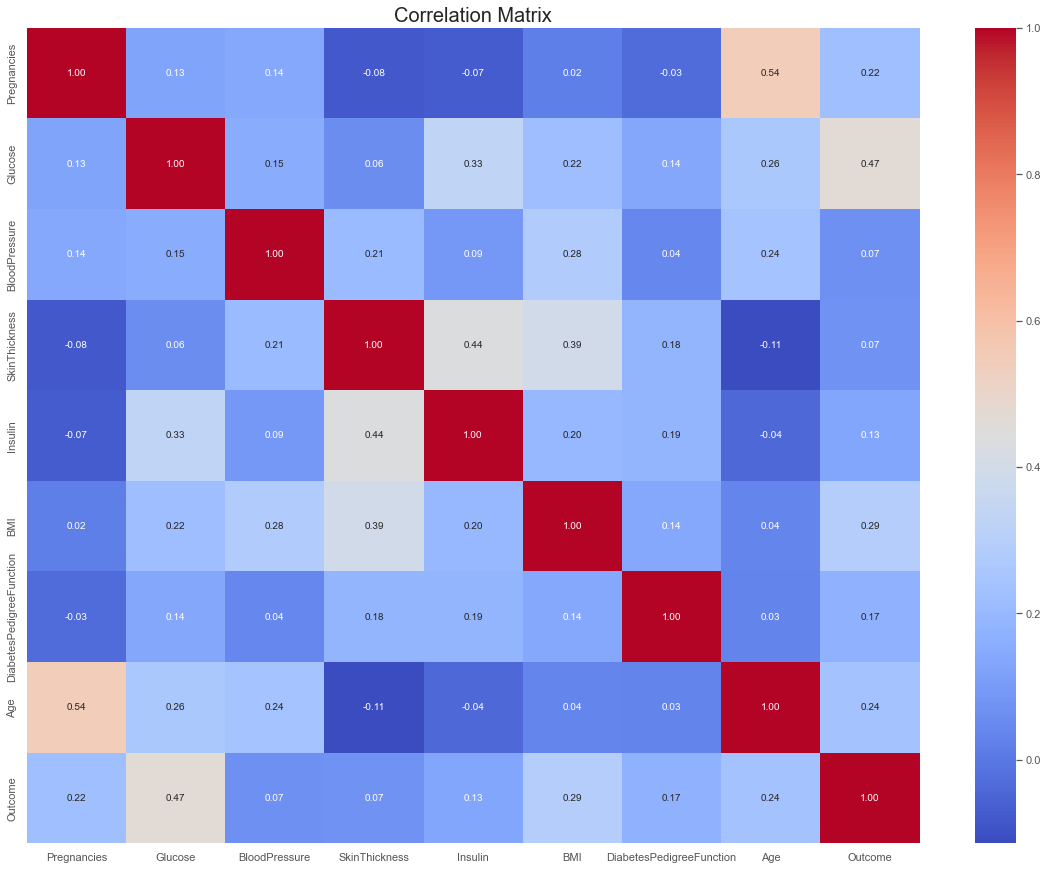

In [100]:
# Correlation matrix of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap ='coolwarm' )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Data Preprocessing 

### Missing Observation Analysis 

In [101]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [102]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [103]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [104]:
# The missing values will be filled with the median values of each variable
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [105]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [106]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


In [107]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Pair Plot for clean data 

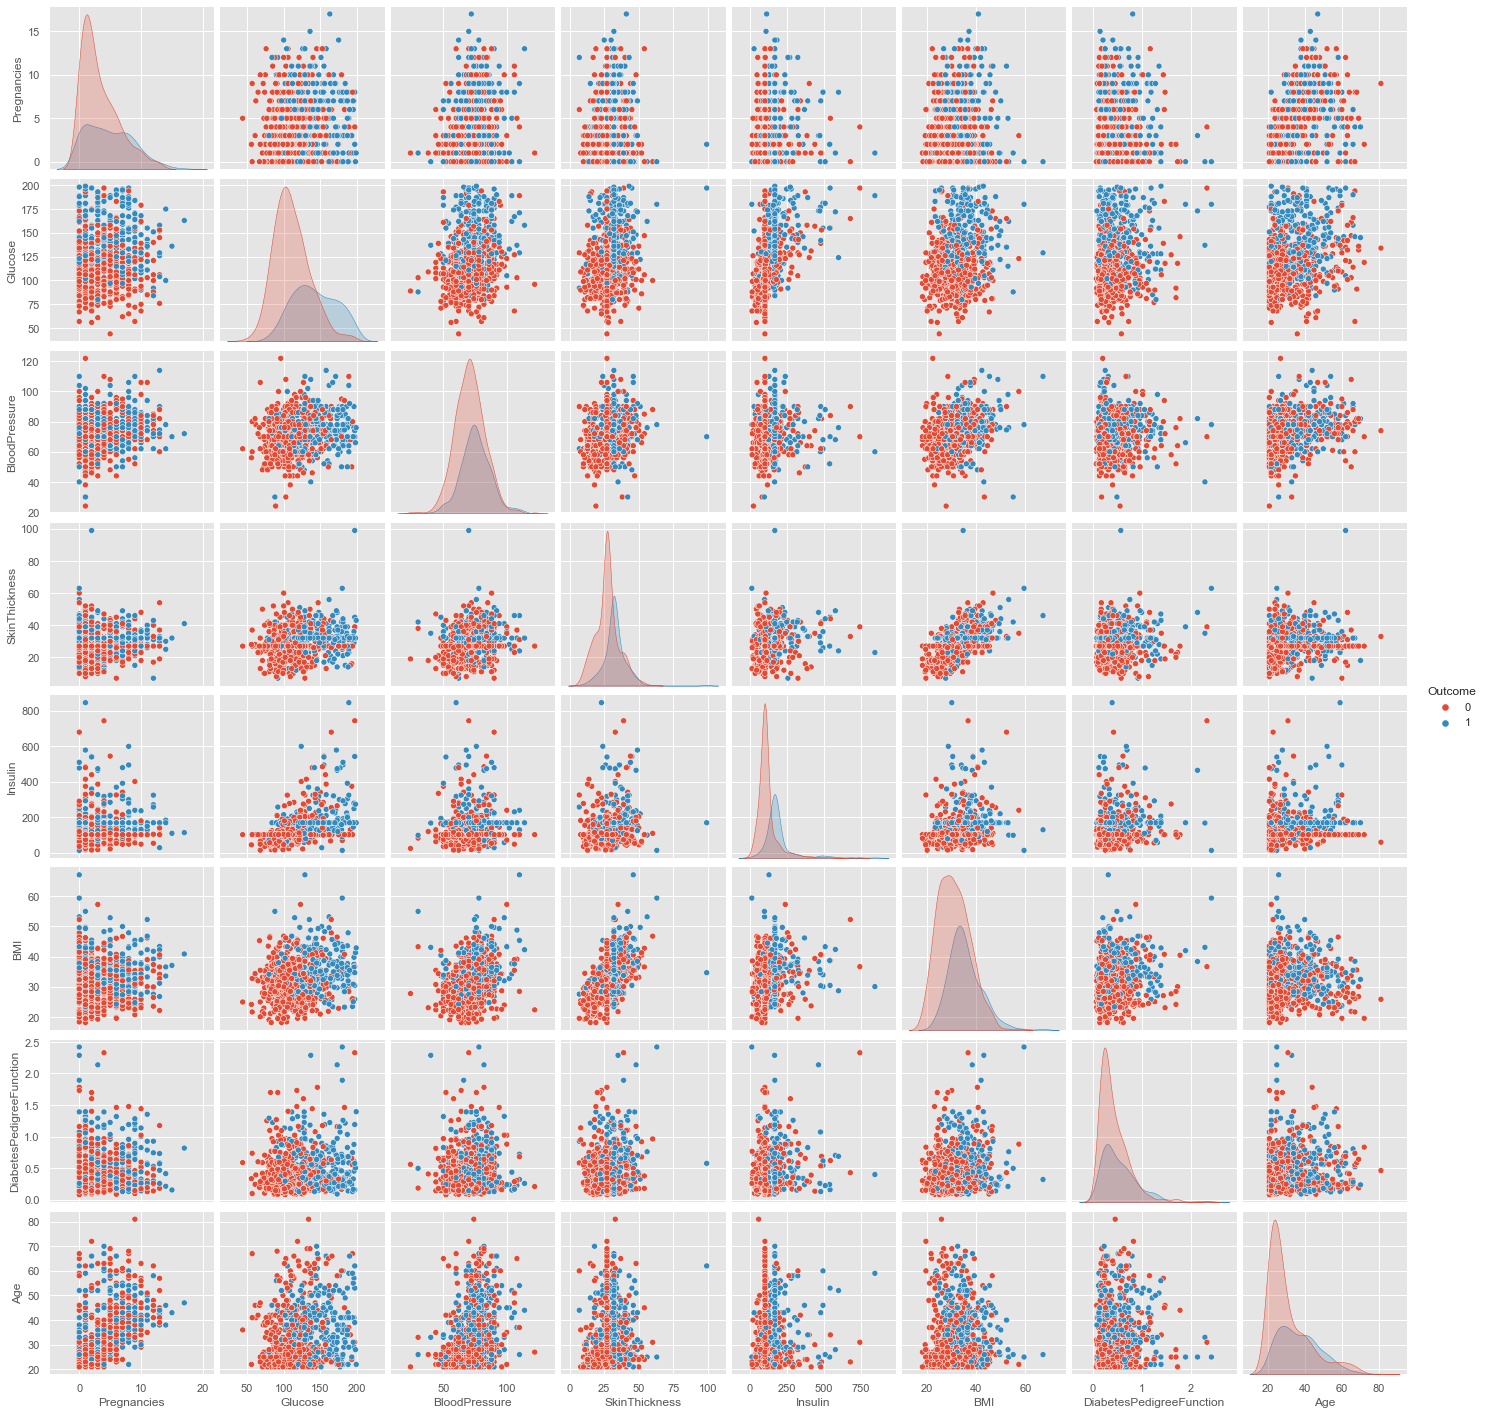

In [108]:
#The histogram on the diagonal allows us to see the distribution of a single variable while 
#the scatter plots on the upper and lower triangles show the relationship between two variables.

p=sns.pairplot(df, hue = 'Outcome')

### Outlier observation 

In [109]:
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,": yes")
    else:
        print(feature, ": no")

Pregnancies : yes
Glucose : no
BloodPressure : yes
SkinThickness : yes
Insulin : yes
BMI : yes
DiabetesPedigreeFunction : yes
Age : yes
Outcome : no


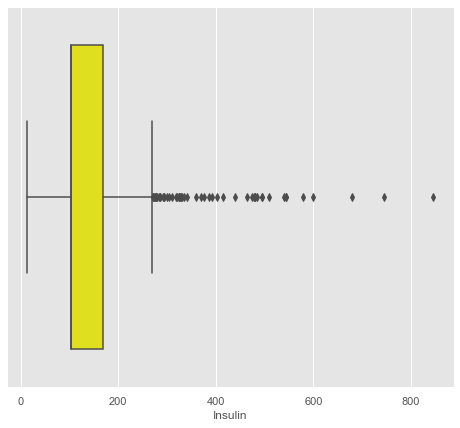

In [110]:
# Outlier observation of Insulin
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="yellow");

In [111]:
# Conducting a stand alone observation review for the Insulin variable
# Suppressing contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

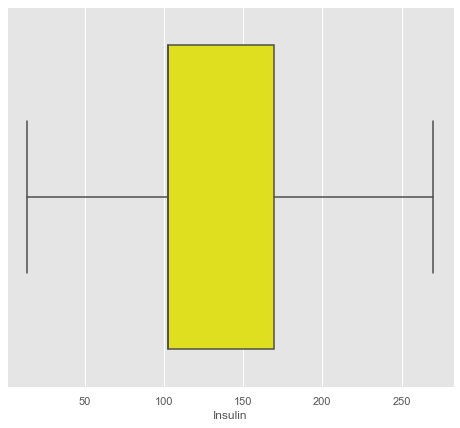

In [112]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="yellow");

### Local Outlier Factor 

In [168]:
#The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. 
#It considers as outliers the samples that have a substantially lower density than their neighbors.

In [113]:
# Determining the outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [114]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [115]:
# Choosing the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.740031580305444

In [116]:
# Deleting those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [117]:
# Examining the size of the data.
df.shape

(760, 9)

## Feature Engineering 

In [118]:
#Creating logical new variables is important for models.
#For this data set, some new variables will be created according to BMI, Insulin and glucose variables.

In [119]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [120]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,Obesity 1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2
8,2,197.0,70.0,45.0,270.0,30.5,0.158,53,1,Obesity 1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1,Obesity 1


In [121]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [122]:
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [123]:
# Intervals and categorical variables for glucose levels
NewGlucose = pd.Series(["Low", "Normal", "High", "VeryHigh","Extreme"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [124]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,VeryHigh
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,VeryHigh
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,VeryHigh
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,High
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,Obesity 1,Normal,Normal
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2,Normal,High
8,2,197.0,70.0,45.0,270.0,30.5,0.158,53,1,Obesity 1,Abnormal,VeryHigh
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1,Obesity 1,Abnormal,High


### Encoding 

In [125]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. 
#It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [126]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_High,NewGlucose_Low,NewGlucose_Normal,NewGlucose_VeryHigh
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,0,1,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,0,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [127]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal','NewGlucose_High','NewGlucose_VeryHigh']]

In [128]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_High,NewGlucose_VeryHigh
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [129]:
Y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_High','NewGlucose_VeryHigh'], axis = 1)
cols = X.columns
index = X.index

In [130]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [131]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [132]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [133]:
X = pd.concat([X,categorical_df], axis = 1)

In [134]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_High,NewGlucose_VeryHigh
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,0,0,0,1,0,1,0,1,0,0
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,0,0,1,0,0,0,0,0,0,1


In [135]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [136]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [137]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building 

### 1) Logistic Regression 

In [138]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [139]:
# model predictions

Y_pred = log_reg.predict(X_test)

In [141]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(Y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(Y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.8402255639097744
0.881578947368421


In [142]:
# confusion matrix

print(confusion_matrix(Y_test, Y_pred))

[[134  13]
 [ 14  67]]


In [144]:
# classification report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       147
           1       0.84      0.83      0.83        81

    accuracy                           0.88       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.88      0.88      0.88       228



### 2) Decision Tree Classifier 

In [145]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [146]:
#model prediction

Y_pred = dtc.predict(X_test)

In [147]:
print(accuracy_score(Y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))
print(dtc_acc)

1.0
0.8245614035087719


In [148]:
# confusion matrix

print(confusion_matrix(Y_test, Y_pred))

[[122  25]
 [ 15  66]]


In [149]:
#classification report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       147
           1       0.73      0.81      0.77        81

    accuracy                           0.82       228
   macro avg       0.81      0.82      0.81       228
weighted avg       0.83      0.82      0.83       228



### 3) Random Forest Classifier 

In [152]:
from sklearn.ensemble import RandomForestClassifier

ran_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
ran_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [153]:
Y_pred = ran_clf.predict(X_test)

In [155]:
# accuracy score

print(accuracy_score(Y_train, ran_clf.predict(X_train)))

ran_clf_acc = accuracy_score(Y_test, Y_pred)
print(ran_clf_acc)

0.9849624060150376
0.9254385964912281


In [156]:
# confusion matrix

print(confusion_matrix(Y_test, Y_pred))

[[138   9]
 [  8  73]]


In [158]:
# classification report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       147
           1       0.89      0.90      0.90        81

    accuracy                           0.93       228
   macro avg       0.92      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



### 4) XGBoost Classifier 

In [159]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, Y_train)

[11:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
Y_pred = xgb.predict(X_test)

In [162]:
# accuracy score

print(accuracy_score(Y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(Y_test, Y_pred)
print(xgb_acc)

0.9849624060150376
0.8771929824561403


In [163]:
# confusion matrix

print(confusion_matrix(Y_test, Y_pred))

[[132  15]
 [ 13  68]]


In [164]:
# classification report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       147
           1       0.82      0.84      0.83        81

    accuracy                           0.88       228
   macro avg       0.86      0.87      0.87       228
weighted avg       0.88      0.88      0.88       228



### Model Comparison 

In [165]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,92.54
0,Logistic Regression,88.16
3,XgBoost,87.72
1,Decision Tree Classifier,82.46


In [167]:
import pickle
model = ran_clf
pickle.dump(model, open("diabetes.pkl",'wb'))